## Goal
- Implement classification with resnet18 in tinyImagenet dataset using d2l library
    - Wrap tiny imagenet data under d2l library
    - Fit with GPU
    - Record validation losses, accuracy, time taken to train

In [3]:
import d2l.torch as d2l
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from torchvision.models import resnet18
from d2l_data import TinyImagenetD2l

In [4]:
batch_size = 256
num_workers = 2
learning_rate = 0.01
num_epochs = 20
device = d2l.try_gpu()
device

device(type='cuda', index=0)

Filter:   0%|          | 0/100000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

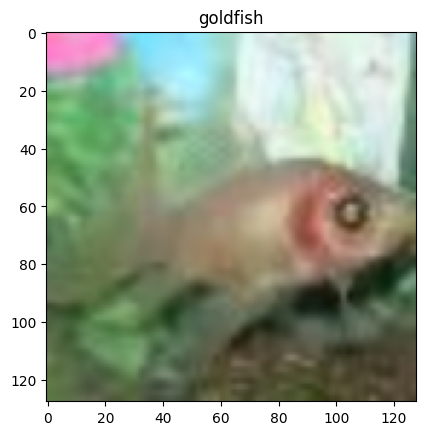

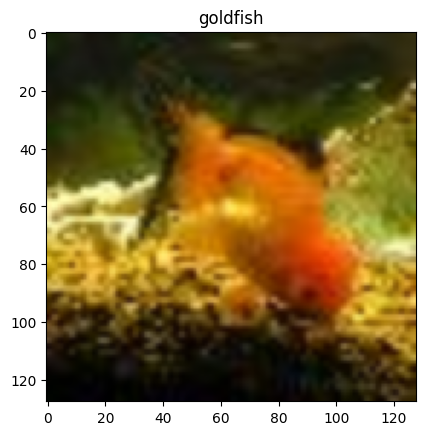

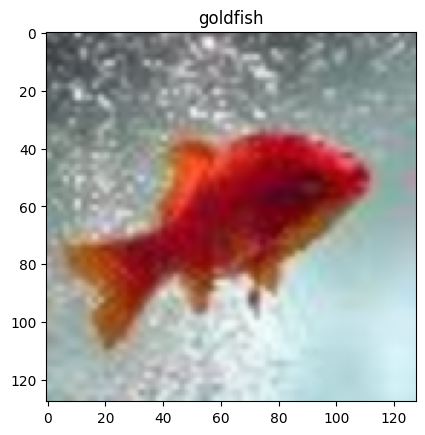

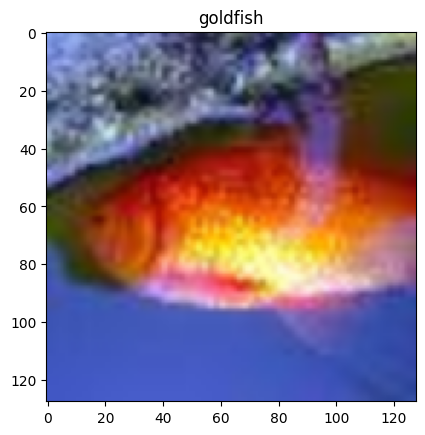

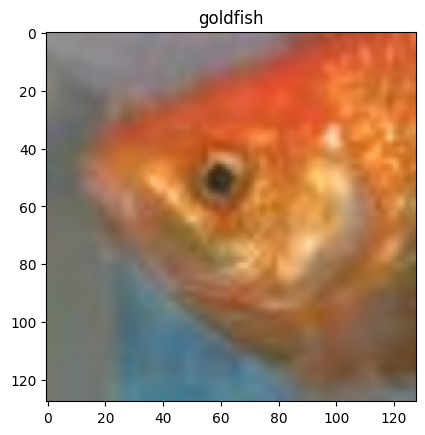

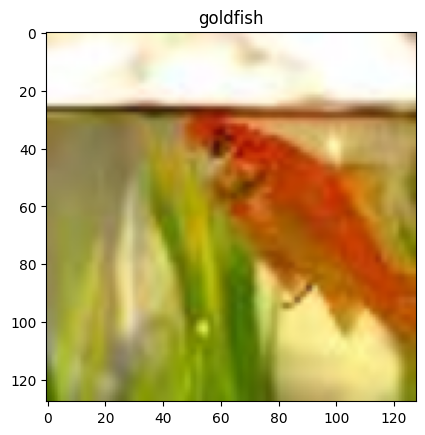

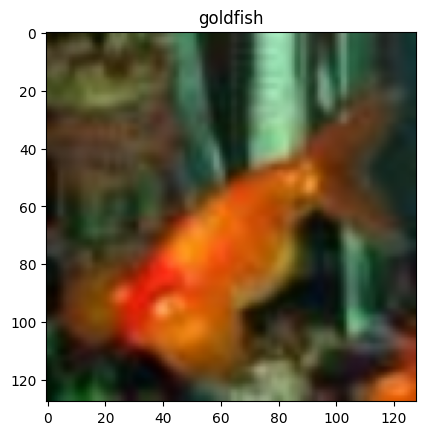

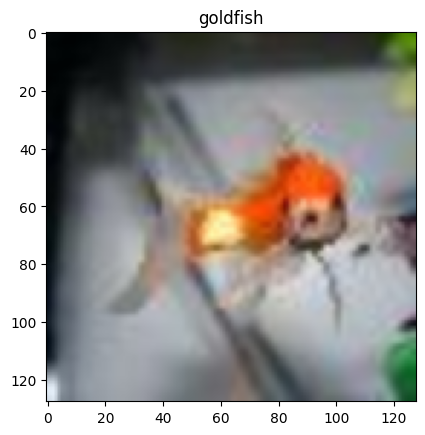

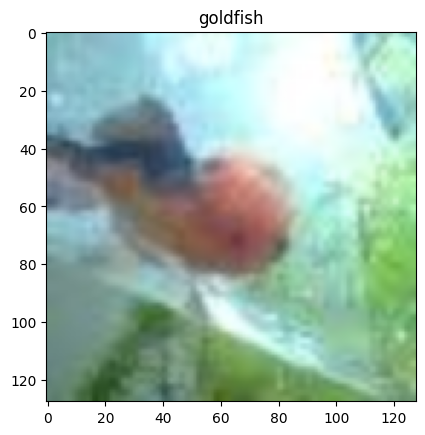

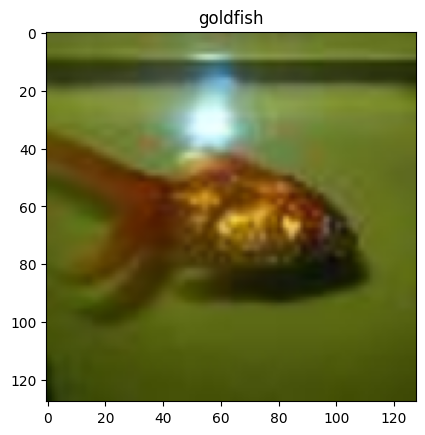

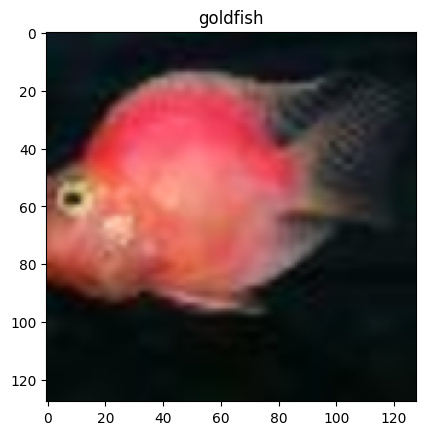

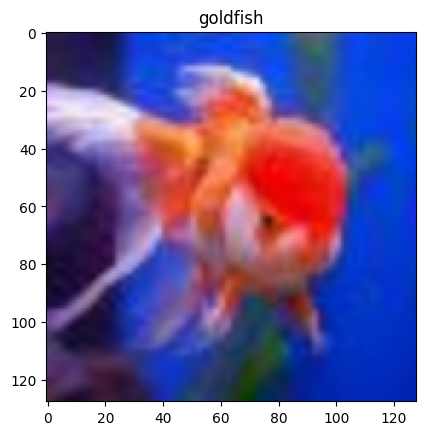

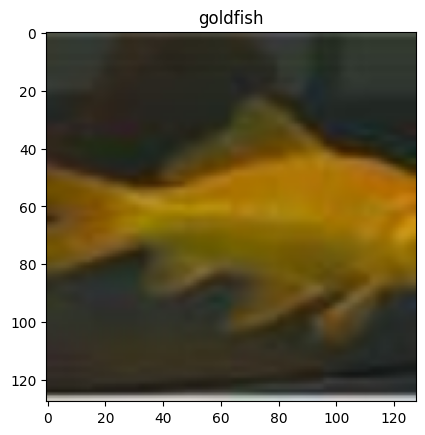

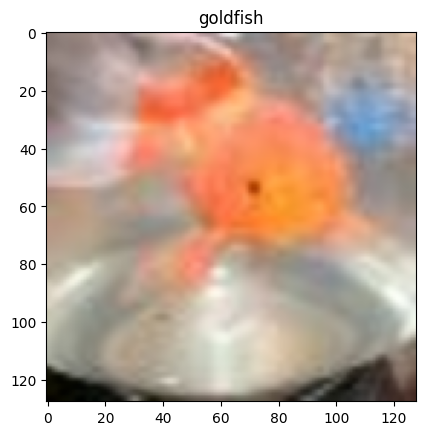

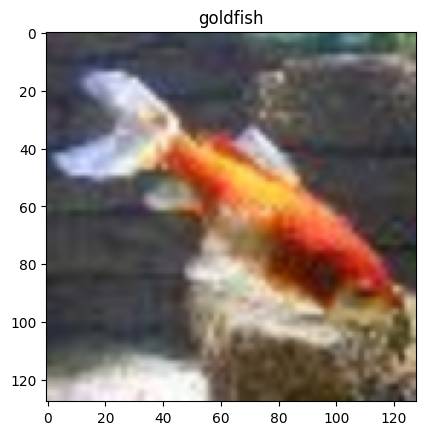

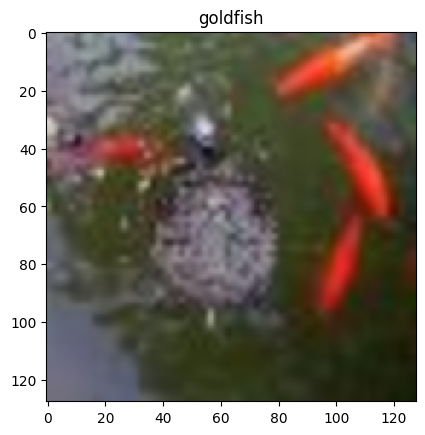

In [5]:
tiny_imagenet = TinyImagenetD2l(batch_size, num_workers, is_toy=True)
train_loader = tiny_imagenet.get_dataloader(train=True)
val_loader = tiny_imagenet.get_dataloader(train=False)

tiny_imagenet.visualize(next(iter(train_loader)))


In [ ]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    x = batch['image']
    y = batch['label']
    return (x.to(self.device), y.to(self.device))

@d2l.add_to_class(d2l.Classifier)
def validation_step(self, batch):
    Y_hat = self(*batch[:-1])
    val_loss = self.loss(Y_hat, batch[-1])
    val_acc = self.accuracy(Y_hat, batch[-1])
    self.metrics['loss']['val'].append(val_loss.item())
    self.metrics['accuracy']['val'].append(val_acc.item())
    self.plot('loss', val_loss, train=False)
    self.plot('accuracy', val_acc, train=False)

@d2l.add_to_class(d2l.Classifier)
def training_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    acc = self.accuracy(self(*batch[:-1]), batch[-1])
    self.metrics['loss']['train'].append(l.item())
    self.metrics['accuracy']['train'].append(acc.item())
    self.plot('loss', l, train=True)
    self.plot('accuracy', acc, train=True)
    return l

@d2l.add_to_class(d2l.Classifier)
def display_metrics(self, num_training_batches, num_val_batches):
    for key, value in self.metrics.items():
        train_metric = self.get_running_mean(value['train'], num_training_batches)
        val_metric = self.get_running_mean(value['val'], num_val_batches)
        print(f'{key} - train: {train_metric}, val: {val_metric}')

@d2l.add_to_class(d2l.Classifier)
def get_running_mean(self, values, num_batches):
    return np.mean(values[-num_batches:])

In [ ]:

data = TinyImagenetD2l(batch_size, num_workers, is_toy=True)
num_training_batches = len(data.train_data)
num_val_batches = len(data.val_data)
model = ResnetD2l(num_classes=data.num_classes, pretrained=False, lr=learning_rate)
model.to(device)

trainer = d2l.Trainer(max_epochs=num_epochs, num_gpus=1)
trainer.device = device
trainer.fit(model=model, data=data)

model.display_metrics(num_training_batches, num_val_batches)




In [ ]:

data = TinyImagenetD2l(batch_size, num_workers, is_toy=True)
num_training_batches = len(data.train_data)
num_val_batches = len(data.val_data)
model = ResnetD2l(num_classes=data.num_classes, pretrained=True, lr=learning_rate)
model.to(device)

trainer = d2l.Trainer(max_epochs=num_epochs, num_gpus=1)
trainer.device = device
trainer.fit(model=model, data=data)

model.display_metrics(num_training_batches, num_val_batches)


